## Workshop: POS tagging, Named Entity Recognition, Vanishing gradient




### Part of Speech (POS) Tagging

POS Tagging is the process of marking each word in a text with its corresponding part of speech (noun, verb, adjective, etc.). This information can be used for various NLP tasks such as sentiment analysis, named entity recognition, and more.

In [1]:
# Importing required libraries
import nltk
from nltk import word_tokenize

# Downloading required resources
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger_eng")

# Defining a function to perform POS Tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    tagged_words = nltk.pos_tag(tokens)
    return tagged_words

# Testing the model on a sample text
text = "This is a sample text for POS Tagging."
tagged_words = pos_tagging(text)
print(tagged_words)

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('text', 'NN'), ('for', 'IN'), ('POS', 'NNP'), ('Tagging', 'NNP'), ('.', '.')]


[nltk_data] Downloading package punkt to /home/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/chris/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


This code tokenizes the text using the word_tokenize function and then performs POS Tagging using the pos_tag function from the nltk library. The pos_tag function returns a list of tuples, where each tuple consists of a token and its corresponding part of speech tag.


### Task 1: POS tagging with spacy

spacy package is designed to perform many useful NLP tasks, such as tokenization, tagging, NER, lemmatization and more.

Implementing POS with spacy package is even simpler than with NLTK.
Find relevant information in spacy documentation.

#### Task: Try a few sentences with more than one meaning, e.g. "I can fish", "Time flies like an arrow". Answer the following questions: Wich meaning of the sentence the tagging is done for? Is this the most likely meaning?

In [2]:
import spacy

! python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
print("token.text, token.lemma_, token.pos_, token.tag_")
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.2 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
token.text, token.lemma_, token.pos_, token.tag_
Apple Apple PROPN NNP
is be AUX VBZ
looking look VERB VBG
at at ADP IN
buying buy VERB VBG
U.K. U.K. PROPN NNP
startup startup VERB VBD
for for ADP IN
$ $ SYM $
1 1 NUM CD
billion billion NUM CD


### Task 2: Implement Hidden Markov Model (HMM) for POS Tagging using NLTK

HMM is a statistical model that can be used to perform POS Tagging. An HMM model is trained on a tagged corpus, and it uses the probabilities of word transitions to predict the part of speech tags for a given text.

This code first tokenizes the sentence into words using the nltk.word_tokenize function, then trains a Hidden Markov Model POS tagger using the nltk.hmm.HiddenMarkovModelTagger.train method and the Penn Treebank corpus. Finally, it uses the trained tagger to perform the POS tagging of the sentence and prints the resulting tags. The output will be a list of tuples, where each tuple consists of a word and its corresponding POS tag.

##### Task: Complete the following code to implement HMM tagging with NLTK. Try sentences that you have tried in Task 1 and compare the results. Are results for more difficult sentences the same or different? Which tagger is better or more accurate?

Use NLTK docmumentation to complete the code https://www.nltk.org/_modules/nltk/tag/hmm.html

In [3]:
from nltk.tag import HiddenMarkovModelTagger
import nltk
nltk.download('treebank') # done first time

# Define the sample sentence
sentence = "I love playing soccer in the park"

# Tokenize the sentence into words
tokens = nltk.word_tokenize(sentence)

# Use the HMM POS tagger from the nltk library
hmm_tagger = HiddenMarkovModelTagger.train(nltk.corpus.treebank.tagged_sents())

# Perform the POS tagging
pos_tags = hmm_tagger.tag(tokens)

print(pos_tags)

[nltk_data] Downloading package treebank to /home/chris/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


[('I', 'PRP'), ('love', 'VBP'), ('playing', 'VBG'), ('soccer', 'RP'), ('in', 'IN'), ('the', 'DT'), ('park', 'NN')]


### Task 3: Named Entity Recognition (NER)


Named Entity Recognition (NER) is a task in Natural Language Processing (NLP) to identify and extract named entities such as people, organizations, locations, and other entities from unstructured text. NER is used to extract relevant information from large amounts of text data, which can be used for various purposes such as information retrieval, question answering, and text summarization.

#### Task: Try to add missing code to complete NER tagging below. Refer to spacy documentation for help

In [8]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
text = """In ancient Rome, some neighbors live in three adjacent houses. In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves, including head slave Hysterium and the musical's main character Pseudolus. A slave belonging to Hero, Pseudolus wishes to buy, win, or steal his freedom. One of the neighboring houses is owned by Marcus Lycus, who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius, who is abroad searching for his long-lost children (stolen in infancy by pirates). One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero. Hero confides in Pseudolus that he is in love with the lovely Philia, one of the courtesans in the House of Lycus (albeit still a virgin)."""

doc = nlp(text)
sentence_spans = list(doc.sents)

displacy.render(sentence_spans, style="ent")

### Task 3: Vanishing gradient

The followig code demostrates vanishing gradient problem for sigmoid activation function.

In this simple code, we’re storing the mean of the gradients at each epoch in a list. After the training loop, we plot this list to visualize how the gradient changes over time. You’ll notice that the gradient values decrease over time, demonstrating the vanishing gradient problem.


##### Task: Add more activation functions

Modify the code to implement two more activation functions: ReLU, and Leaky ReLU.
Run the code and compare gradient vanishing: which activation function keep gradient for more epochs? Why?

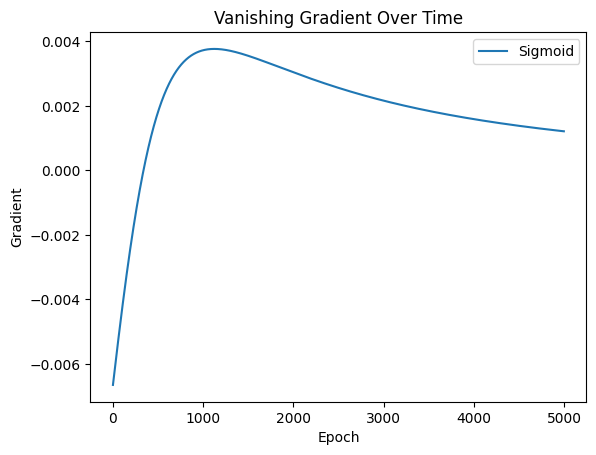

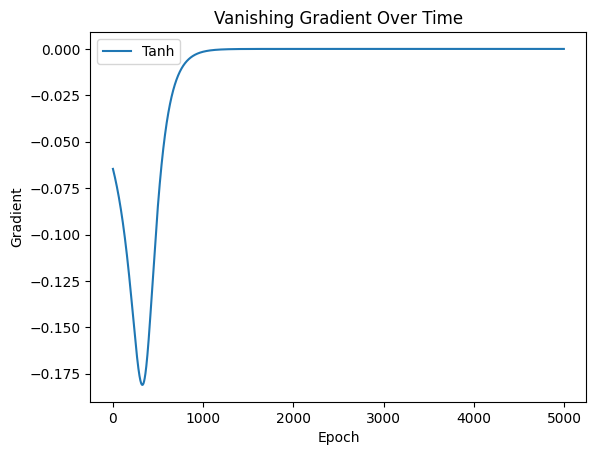

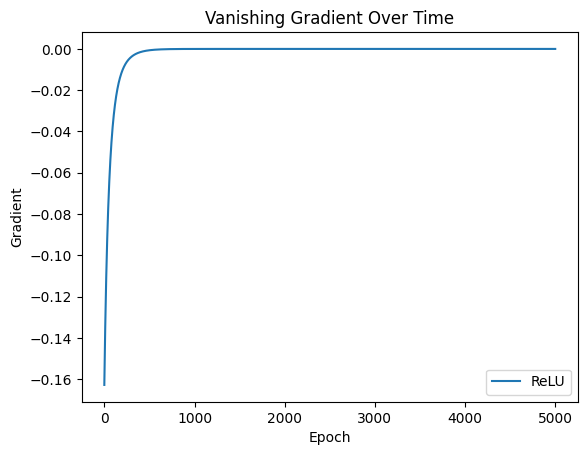

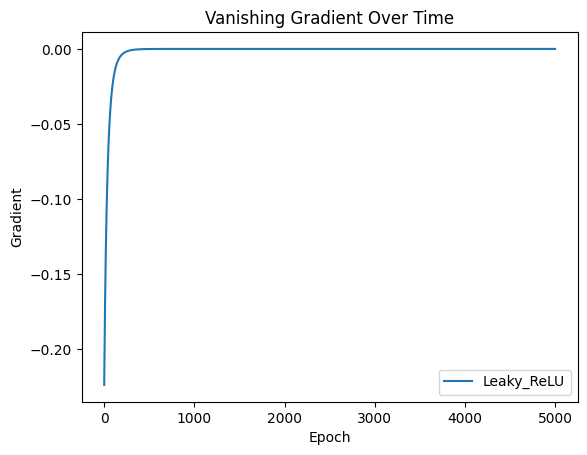

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid, tanh and relu functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(y):
    return y * (1 - y)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(y):
    return 1 - y**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(y):
    return np.where(y <= 0, 0, 1)

leak_value = 0.001
def leaky_relu(x):
    return np.where(x > 0, x, x * leak_value)

def leaky_relu_derivative(x):
    dx = np.ones_like(x)
    dx[x < 0] = leak_value
    return dx

# size of layers
inputLayer_size = 2
hiddenLayer_size = 3
outputLayer_size = 1

# weights initialization
weights_ih = np.random.uniform(size=(inputLayer_size, hiddenLayer_size))
weights_ho = np.random.uniform(size=(hiddenLayer_size, outputLayer_size))

# inputs and outputs
inputs = np.array([[0.5, 0.6]])
outputs = np.array([[0.1]])

# learning rate
lr = 0.01

# store gradients
gradients_sigmoid = []
gradients_tanh = []
gradients_relu = []
gradients_leaky_relu = []

# training loop for each activation function
for activation, derivative, gradients in [(sigmoid, sigmoid_derivative, gradients_sigmoid), 
                                          (tanh, tanh_derivative, gradients_tanh), 
                                          (relu, relu_derivative, gradients_relu),
                                          (leaky_relu, leaky_relu_derivative, gradients_leaky_relu)
                                         ]:
    # reset weights
    weights_ih = np.random.uniform(size=(inputLayer_size, hiddenLayer_size))
    weights_ho = np.random.uniform(size=(hiddenLayer_size, outputLayer_size))

    for epoch in range(5000):
        # forward pass
        hiddenLayer_input = np.dot(inputs, weights_ih)
        hiddenLayer_output = activation(hiddenLayer_input)

        outputLayer_input = np.dot(hiddenLayer_output, weights_ho)
        outputLayer_output = activation(outputLayer_input)

        # backward pass
        outputLayer_error = outputs - outputLayer_output
        outputLayer_delta = outputLayer_error * derivative(outputLayer_output)

        hiddenLayer_error = np.dot(outputLayer_delta, weights_ho.T)
        hiddenLayer_delta = hiddenLayer_error * derivative(hiddenLayer_output)

        # update weights
        weights_ho += lr * np.dot(hiddenLayer_output.T, outputLayer_delta)
        weights_ih += lr * np.dot(inputs.T, hiddenLayer_delta)

        # store gradient
        gradients.append(np.mean(hiddenLayer_delta))

# plot gradients
plt.title('Vanishing Gradient Over Time')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.plot(gradients_sigmoid, label='Sigmoid')
plt.legend()
plt.show()

plt.title('Vanishing Gradient Over Time')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.plot(gradients_tanh, label='Tanh')
plt.legend()
plt.show()

plt.title('Vanishing Gradient Over Time')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.plot(gradients_relu, label='ReLU')
plt.legend()
plt.show()

plt.title('Vanishing Gradient Over Time')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.plot(gradients_leaky_relu, label='Leaky_ReLU')
plt.legend()
plt.show()
